# Results for TENCON 2024 paper
## Experiment 4: Consensus Analysis

#### Title: Performance Analysis of Selected Swarm-based Robot Search Algorithms for Target Tracking 

#### Authors:

Christian C. Anabeza,
Marck Herzon C. Barrion,
Matthea Flynne T. Sim,
Argel A. Bandala

## Line Plots with Error Bars for Consensus Time

/tmp/ipykernel_9614/3346522756.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Algorithm', y='Consensus Time', data=df, palette=pastel_palette, size=8, jitter=True, alpha=0.7)


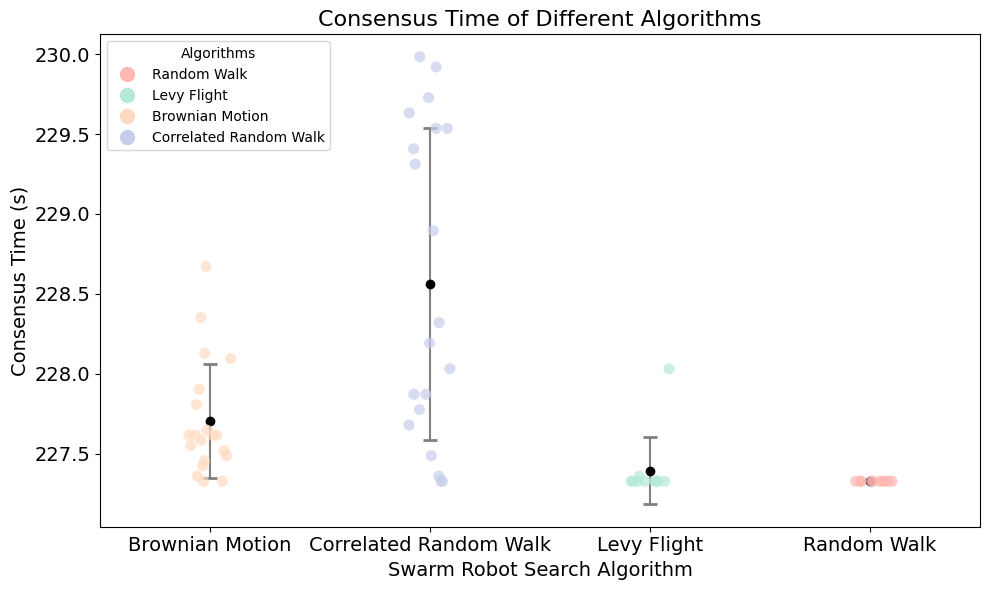

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process directories and calculate consensus time
def process_directory(base_dir, skip_lines=False):
    consensus_times = []

    for run_dir in sorted(os.listdir(base_dir)):
        run_path = os.path.join(base_dir, run_dir, 'e-puck.csv')
        if os.path.isfile(run_path):
            if skip_lines:
                df = pd.read_csv(run_path, skip_blank_lines=True)
            else:
                df = pd.read_csv(run_path)
            
            # Get the time where consensus_flag is True
            consensus_time = df.loc[df['consensus_flag'] == True, 'time']
            if not consensus_time.empty:
                consensus_times.append(consensus_time.iloc[0])

    return consensus_times

# Base directories for each algorithm
directories = {
    "Random Walk": "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets",
    "Levy Flight": "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets",
    "Brownian Motion": "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_20targets",
    "Correlated Random Walk": "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_20targets"
}

# Collect consensus time data for each algorithm
data = []

for algorithm, dir_path in directories.items():
    if algorithm in ["Random Walk", "Levy Flight"]:
        consensus_times = process_directory(dir_path, skip_lines=True)
    else:
        consensus_times = process_directory(dir_path, skip_lines=False)
    
    for consensus_time in consensus_times:
        data.append({"Algorithm": algorithm, "Consensus Time": consensus_time})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Calculate mean and standard deviation for each algorithm
mean_std = df.groupby('Algorithm')['Consensus Time'].agg(['mean', 'std']).reset_index()

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Plotting the consensus times using line plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(mean_std['Algorithm'], mean_std['mean'], yerr=mean_std['std'], fmt='o', capsize=5, capthick=2, color='black', ecolor='gray')
sns.stripplot(x='Algorithm', y='Consensus Time', data=df, palette=pastel_palette, size=8, jitter=True, alpha=0.7)
plt.title('Consensus Time of Different Algorithms', fontsize=16)
plt.xlabel('Swarm Robot Search Algorithm', fontsize=14)
plt.ylabel('Consensus Time (s)', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Add legend
handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color in pastel_palette.values()]
labels = pastel_palette.keys()
plt.legend(handles, labels, title='Algorithms', loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()
